## Exercise 6.2 - Exploring Relationships

### Contents

#### 1. Import Libraries and Dataframe
#### 2. Correlations 
#### 3. Scatterplots
#### 4. Pair Plot
#### 5. Categorical Plot
#### 6. Revist questions
#### 7. Hypothesis

### 1. Import Libraries and Dataframe

#### * Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 

import os
import warnings

In [2]:
#Check matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
#Ensures charts created are displayed in the notebook
%matplotlib inline

In [4]:
#Define Path
path = r'/Users/anfran/Desktop/Chocolate Rating Project'

In [5]:
#Import Dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_data_clean.csv'), index_col = False)

In [6]:
#Check dataframe
df.head()

,Row ID,Company,bean_origin,REF,review_date,cocoa_percent,company_location,Rating,bean_type,broad_bean_origin
0,1177,Neuhaus (Callebaut),Sao Tome,15,2006,0.75,Belgium,2.75,Forastero,Sao Tome
1,1292,Pierre Marcolini,"Porcelana, Tabasco, Limited Ed.",81,2006,0.72,Belgium,4.00,Criollo,Mexico
2,1237,Original Hawaiin Chocolate Factory,"Hawai'i, Kona Estate Grown",24,2006,0.60,United States,3.00,Unknown,Hawaii
3,1178,Neuhaus (Callebaut),Ocumare,24,2006,0.71,Belgium,3.00,Criollo,Venezuela
4,1176,Neuhaus (Callebaut),West Africa,15,2006,0.73,Belgium,2.00,Forastero,West Africa


In [7]:
df.shape

(1795, 10)

#### * Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

I plan to use the cocoa_percent, company_location, and Rating columns primarily to answer the questions I created in the last exercise. 

### 2. Correlations

In [8]:
#Create a correlation matrix 
df.corr()

,Row ID,REF,review_date,cocoa_percent,Rating
Row ID,1.000000,0.025188,0.023034,0.031552,-0.017043
REF,0.025188,1.000000,0.985076,0.037832,0.101030
review_date,0.023034,0.985076,1.000000,0.038219,0.099846
cocoa_percent,0.031552,0.037832,0.038219,1.000000,-0.165035
Rating,-0.017043,0.101030,0.099846,-0.165035,1.000000


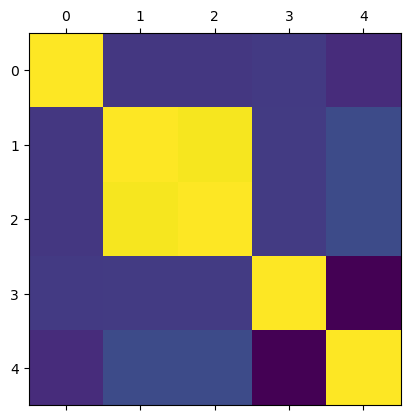

In [9]:
#Create a correlation matrix heatmap (colored)
plt.matshow(df.corr())
plt.show()

In [10]:
#Create a column subset
sub = df[['Row ID', 'REF', 'review_date', 'cocoa_percent','Rating']]

In [11]:
sub

,Row ID,REF,review_date,cocoa_percent,Rating
0,1177,15,2006,0.75,2.75
1,1292,81,2006,0.72,4.00
2,1237,24,2006,0.60,3.00
3,1178,24,2006,0.71,3.00
4,1176,15,2006,0.73,2.00
...,...,...,...,...,...
1790,161,1948,2017,0.72,3.25
1791,160,1948,2017,0.73,3.00
1792,669,1940,2017,0.70,3.50
1793,1560,1936,2017,0.77,3.25


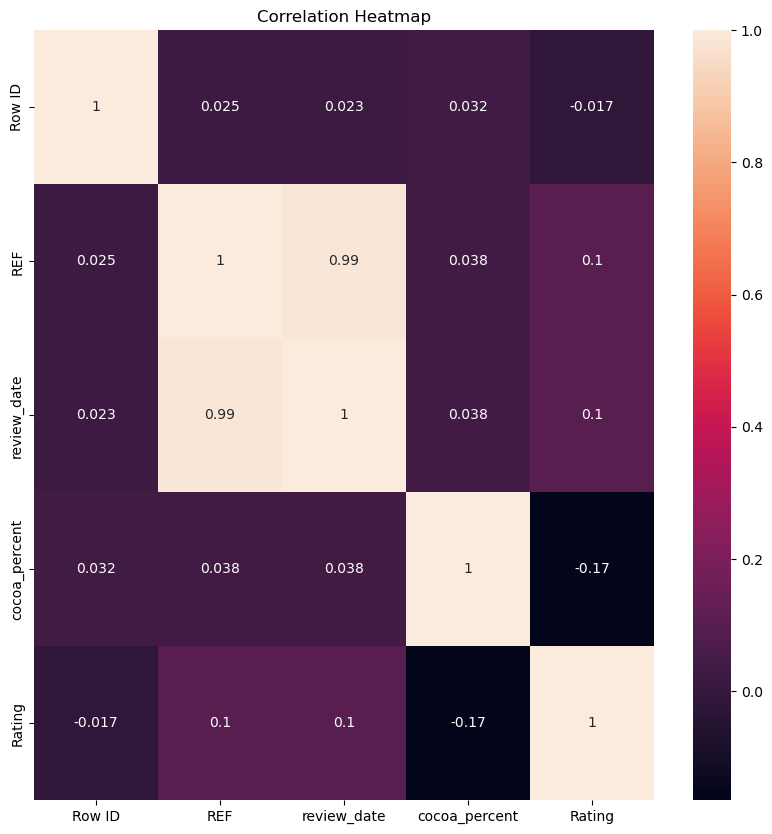

In [12]:
# Create a subplot with matplotlib and a correlation heatmap in seaborn
f,ax = plt.subplots(figsize=(10,10)) 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax).set(title='Correlation Heatmap')

#### * Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

1) There is a weak negative correlation between the cocoa percentage and the rating.

2) There is a strong correlation between the REF and the review_date, but I do not see how that is relevant to the proposed questions. 

3) The overall rating does not appear to have any correlations with the cocoa_percentage or review date. 


### 3. Scatterplots

#### * Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships

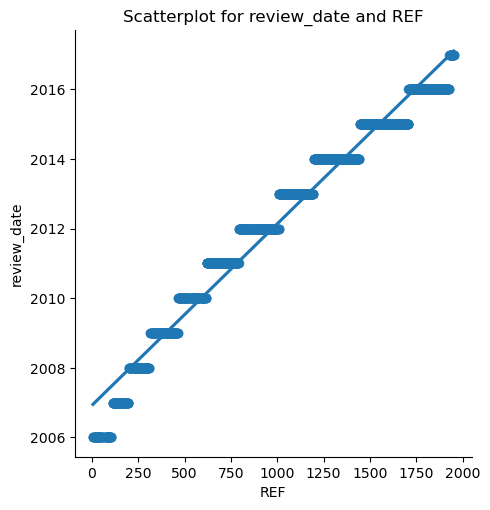

In [13]:
#Create scatterplot for 'REF' and 'review_date' in seaborn
sns.lmplot(x = 'REF', y = 'review_date', data = df).set(title='Scatterplot for review_date and REF')

#### NOTE: The only reason I chose these columns is because the question asked me to use the variables with the strongest correlation. A correlation between these two variables is not relevant to the proposed questions, nor will the help to identify why certain chocolates received higher ratings. I will create a scatterplot for the 'cocoa_percent' and 'Rating' since a correlation between those variables was one of the proposed questions. 

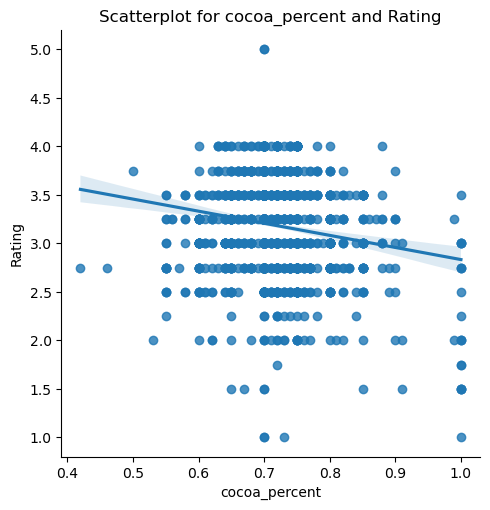

In [14]:
#Create scatterplot for 'cocoa_percent' and 'Rating' in seaborn
sns.lmplot(x = 'cocoa_percent', y = 'Rating', data = df).set(title='Scatterplot for cocoa_percent and Rating')

#### * Discuss the output in a markdown cell

This chart further confirms that there is an extremely weak correlation between the rating and the cocoa percentage. If anything, the rating slightly drops as the cocoa percentage increases. 

### 4. Pair Plot

#### * Create a pair plot of the entire data set

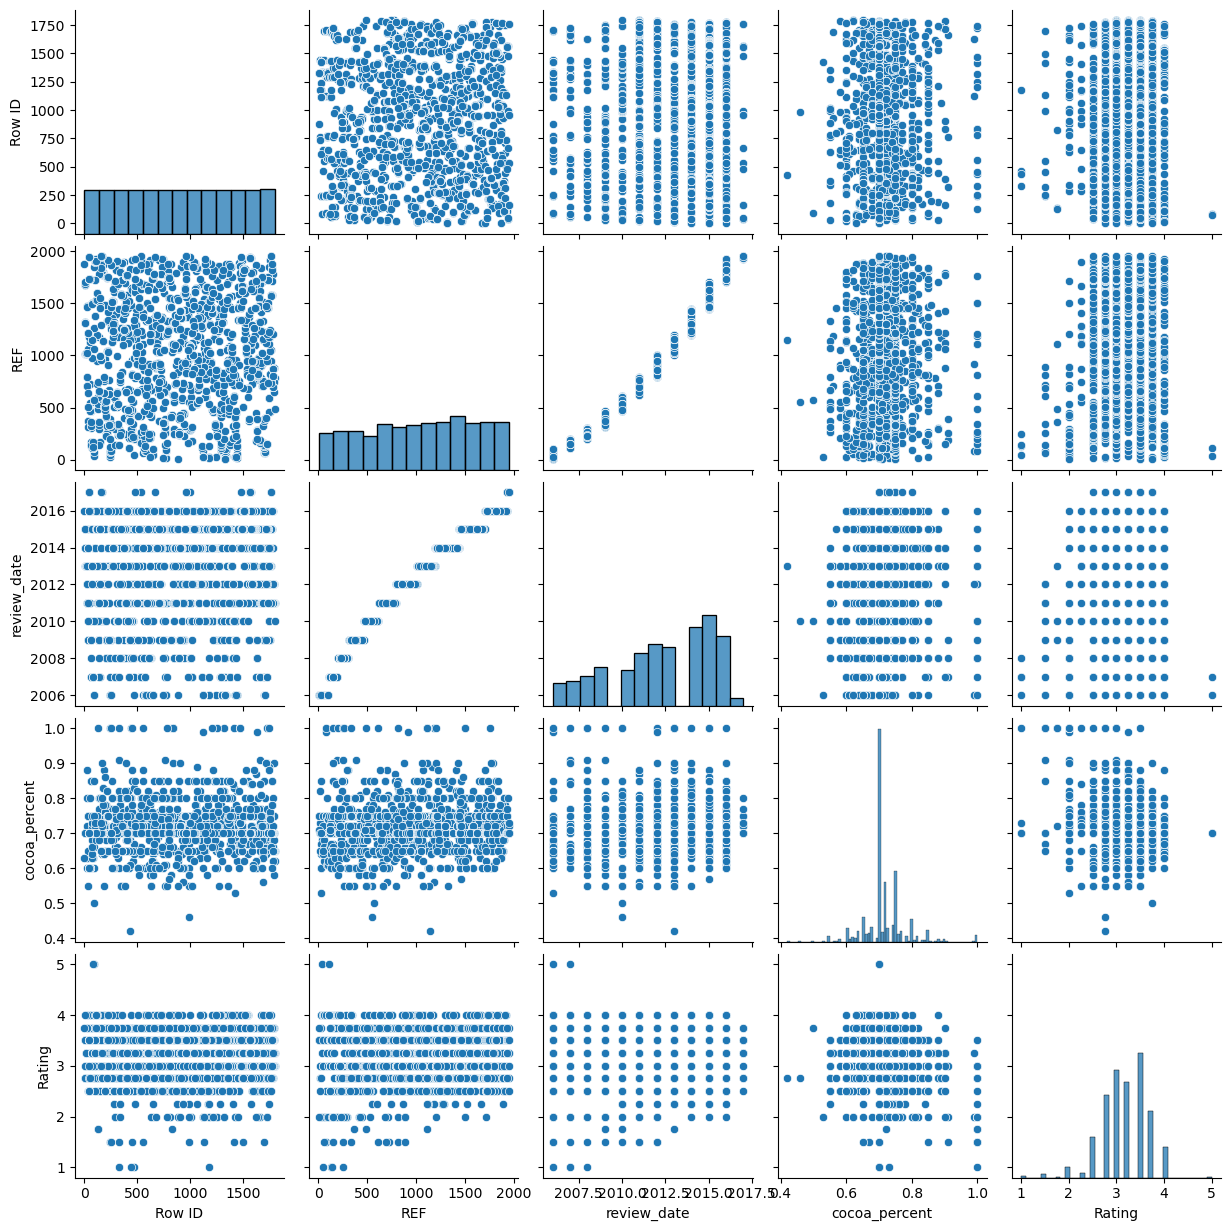

In [15]:
#Create a pair plot using the subset created earlier
g = sns.pairplot(sub)

#### As noted before, I am not finding much useful information here. I believe that my analysis going forward will rely on the companies geographical locations, and how they influence the overall ratings. 

### 5. Categorical Plot

#### * Create a categorical plot and interpret the results.

<AxesSubplot:xlabel='Rating', ylabel='Count'>

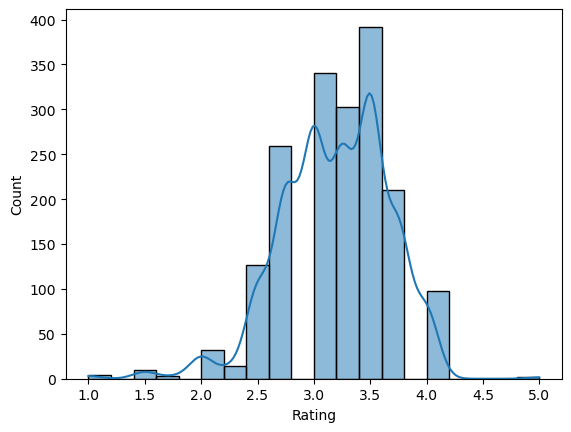

In [16]:
#Create histrogram for 'Rating'
sns.histplot(df['Rating'], bins = 20, kde = True)

In [17]:
#Create categories
df.loc[df['Rating'] < 2.0, 'Rating category'] = 'Low rating' 
df.loc[(df['Rating'] >= 2.0) & (df['Rating'] < 4.0), 'Rating category'] = 'Average rating' 
df.loc[df['Rating'] >= 4.0, 'Rating category'] = 'High rating'

In [18]:
df['Rating category'].value_counts(dropna = False)

Average rating    1678
High rating        100
Low rating          17
Name: Rating category, dtype: int64

In [19]:
df.columns

Index(['Row ID', 'Company', 'bean_origin', 'REF', 'review_date',
       'cocoa_percent', 'company_location', 'Rating', 'bean_type',
       'broad_bean_origin', 'Rating category'],
      dtype='object')

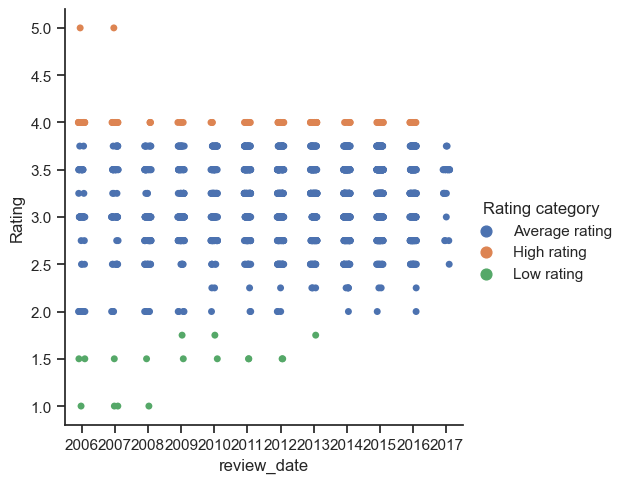

In [20]:
#Create Catplot using 'Rating category'
sns.set(style="ticks")
g = sns.catplot(x="review_date", y="Rating", hue="Rating category", data=df)

#### * Low ratings stop after 2013. This could mean that the chocolate quality was getting better, or that the rating company was becoming more lenient. 

### 6. Revisit Questions

#### * Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration

1)	Which companies and/or countries are producing the best tasting chocolate?

This question still needs to be answered, and I'm sure will be explored when we discuss heatmaps in Python. 

2)	Is there a correlation between cocoa percentage and taste rating?

No, there is not a correlation between cocoa percentage and taste ratings

3)	Do certain countries produce beans that result in a higher taste rating?

This question still needs to be answered, and I'm sure will be explored when we discuss heatmaps in Python. 

4)	Do certain bean types result in a higher taste rating?

This question still needs to be answered

#### Additional Questions

1) Why did low ratings stop in 2013?

### 7. Hypothesis


If the percentage of cocoa in the chocolate changes, the overall taste rating of the chocolate does not change. 

In [21]:
#Export dataset with new ratings column